# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

In [10]:
img = mnist.train.images[2]
img

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

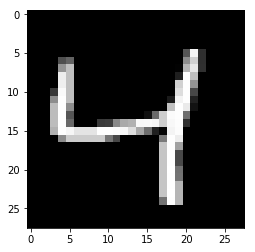

In [8]:
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [21]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

mnist_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, mnist_size), name='inputs')
targets_ = tf.placeholder(tf.float32, shape=(None, mnist_size), name='targets') # used later on

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, mnist_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [18]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [22]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6966
Epoch: 1/20... Training loss: 0.6928
Epoch: 1/20... Training loss: 0.6893
Epoch: 1/20... Training loss: 0.6854
Epoch: 1/20... Training loss: 0.6812
Epoch: 1/20... Training loss: 0.6766
Epoch: 1/20... Training loss: 0.6711
Epoch: 1/20... Training loss: 0.6638
Epoch: 1/20... Training loss: 0.6554
Epoch: 1/20... Training loss: 0.6473
Epoch: 1/20... Training loss: 0.6374
Epoch: 1/20... Training loss: 0.6225
Epoch: 1/20... Training loss: 0.6115
Epoch: 1/20... Training loss: 0.5990
Epoch: 1/20... Training loss: 0.5820
Epoch: 1/20... Training loss: 0.5651
Epoch: 1/20... Training loss: 0.5486
Epoch: 1/20... Training loss: 0.5298
Epoch: 1/20... Training loss: 0.5081
Epoch: 1/20... Training loss: 0.4930
Epoch: 1/20... Training loss: 0.4746
Epoch: 1/20... Training loss: 0.4585
Epoch: 1/20... Training loss: 0.4410
Epoch: 1/20... Training loss: 0.4232
Epoch: 1/20... Training loss: 0.4110
Epoch: 1/20... Training loss: 0.3963
Epoch: 1/20... Training loss: 0.3838
E

Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1863
E

Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1452
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1515
E

Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1397
E

Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1299
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1296
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1190
E

Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1111
Epoch: 4/20... Training loss: 0.1123
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1093
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1112
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1089
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1171
E

Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1041
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1016
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1086
E

Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.0993
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1029
E

Epoch: 7/20... Training loss: 0.1072
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1049
E

Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1041
Epoch: 8/20... Training loss: 0.0988
E

Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0931
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.0956
E

Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0919
Epoch: 9/20... Training loss: 0.1000
E

Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.1009
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.1006
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0894
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0991
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0900
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0999
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0987
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0977
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

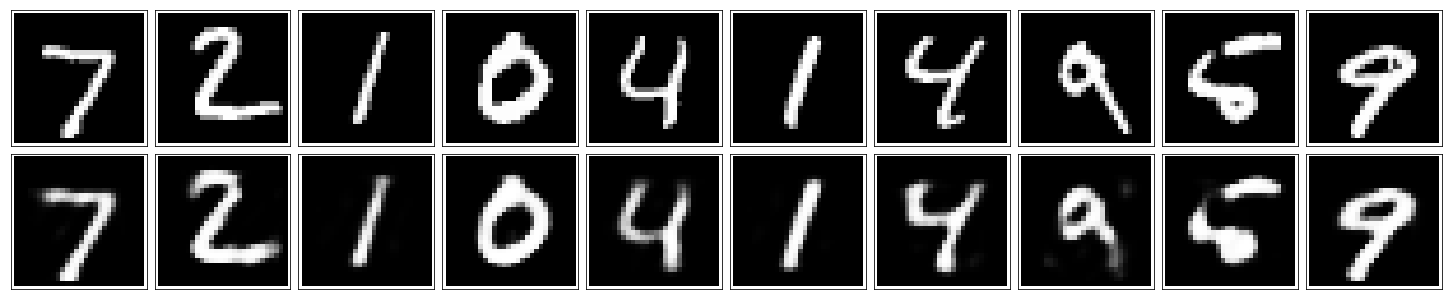

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [24]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.